<a href="https://colab.research.google.com/github/kclassie/ML_sundries/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%9C%D0%B0%D1%81%D0%BA_%D0%94%D1%83%D1%80%D0%BE%D0%B2_%D0%A6%D1%83%D0%BA%D0%B5%D1%80%D0%B1%D0%B5%D1%80%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание №4

Это творческое домашнее задание, в нем не будет ноутбука с инструкцией по выполнению. Ваша задача - обучить одну из встроенных в библиотеки keras или pytorch архитектуру (см. https://keras.io/applications/ и https://pytorch.org/docs/master/torchvision/models ). Вы будете обучать нейронную сеть на тех же данных, которые мы использовали на семинаре. Для обучения используйте Google Colab, как загружать данные на Google Colab см. https://www.youtube.com/watch?v=Ve5oW1qqbZg&t=155s.

This is a creative homework, it will not have a notebook with instructions. Your task is to train one of the keras or pytorch  built-in architecture (see https://keras.io/applications/ and https://pytorch.org/docs/master/torchvision/models ). You will train the neural network on the same data that we used at the seminar. Use Google Colab for training. See instructions how to upload data to Google Colab here: https://www.youtube.com/watch?v=Ve5oW1qqbZg&t=155s.

**Обратите внимание**:
- Вы можете использовать любой другой набор данных для решения задачи классификации (например, вы можете обучить сеть отличать ваших друзей, лишь бы у вас хватило их фотографий). Если вы решите использовать свой набор данных, расскажите, откуда вы его взяли.
- Вы должны не просто обучить сеть, а получить хорошее (определите сами, что это значит) качество на тесте, а следовательно, вам необходимо построить графики точности и функции потерь, а так же посчитать метрики precision и recall.
- Вы можете получить дополнительные баллы (до 5 дополнительных баллов), если возьмете свой набор данных, или реализуете сеть на pytorch, или обучите и сравните несколько архитектур.

**Note**:
- You can use any other dataset to solve the classification problem (for example, you can train the network to distinguish your friends, if only you have enough of their photos). If you decide to use your dataset, write down where you got it from.
- You should not just train the network, but get acceptable (determine for yourself what it means) quality on the test, and therefore, you need to visualize accuracy and loss functions dynamics, and calculate precision and recall metrics.
- You can ger some extra points (up to 5 points) for doing one of the following: take your own dataset (not the one we've already used), make you neural network using pytorch, or train and compare several architectures. 

# **Эта домашка длилась три ночи и один день...**
1. Я решила сделать свой датасет. Написала для этого парсер гугл картинок. Сначала хотела тренироваться на топ-5 губернаторов. Но что-то с ними пошло не так. Тогда я решила взять кого-то поярче и скачала по 195 фото Павла Дурова, Илона Маска и Марка Цукерберга. Вручную вырезала их лица, чтобы сети было проще учиться)
**Парсер находится здесь:** [ссылка](https://colab.research.google.com/drive/1S7ACGCIFz6-C_dPGzdkJdCMTOtIHqE_3)

**Датасеты:**

фактический размер: [ссылка](https://drive.google.com/open?id=1ifsYNVmJ7JF3epS1LZsqxnfgcZnrVtL5)

размер 100х100: [ссылка](https://drive.google.com/open?id=1mGClsm33tVV1zmoKQCmLXSx2rGYeEgWL)

2. Нашла пример работы с моделью **mobilenet**. Опробовала датасет на ней. Результат получился не очень(

3. Опробовала датасет на **DenseNet**. Меня параметры, количество эпох, батчей... Применяла пуллинг и разные оптимизаторы. Меняла размер тестового и тренинг-датасетов... Ничего не помогло. Скорее всего, виноват датасет. Модель никого не узнает.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# For progress visualization when training the model
! pip install keras_tqdm
# Required for keras_tqdm
! pip install ipywidgets

In [ ]:
import tensorflow as tf
import PIL
%tensorflow_version 1.x

In [ ]:
import numpy as np
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

import os
def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
durov_image_id = os.listdir('/content/gdrive/My Drive/guys/durov')[0]
durov_image = load_image(os.path.join('/content/gdrive/My Drive/guys/durov',durov_image_id))
print(f'shape: {durov_image.shape}')
print(f'type: {type(durov_image)}')
model.predict(durov_image)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
x = Dropout(rate=0.4)(model.output)
x = Dense(3)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [ ]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics = ['acc']
)

In [ ]:
import tensorflow as tf
from keras.applications import mobilenet as _mobilenet
from keras.preprocessing.image import ImageDataGenerator

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=_mobilenet.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
)

ensure_folder_exists('training_aug')
training = datagen.flow_from_directory( 
    '/content/gdrive/My Drive/guys', 
    target_size=(224, 224),
    save_to_dir='./training_aug',
    subset='training'
) 

ensure_folder_exists('validation_aug')
validation = datagen.flow_from_directory( 
    '/content/gdrive/My Drive/guys',
    target_size=(224, 224),
    save_to_dir='./validation_aug',
    subset='validation'
) 

Found 528 images belonging to 3 classes.
Found 57 images belonging to 3 classes.


In [ ]:
! pip install keras-tqdm
from keras_tqdm import TQDMNotebookCallback

In [ ]:
batch_size = 32

history = model.fit_generator(
    generator=training,
    steps_per_epoch=training.samples // batch_size,
    epochs=10,
    callbacks=[TQDMNotebookCallback(leave_inner=True, leave_outer=True)],
    validation_data=validation,
    validation_steps=validation.samples // batch_size
)

Epoch 1/10
16/16 [==============================] - 41s 3s/step - loss: 1.1978 - acc: 0.3569 - val_loss: 1.1145 - val_acc: 0.5000


Epoch 2/10
16/16 [==============================] - 18s 1s/step - loss: 1.2088 - acc: 0.3528 - val_loss: 1.1315 - val_acc: 0.4062


Epoch 3/10
16/16 [==============================] - 18s 1s/step - loss: 1.1833 - acc: 0.3871 - val_loss: 1.1256 - val_acc: 0.3438


Epoch 4/10
16/16 [==============================] - 18s 1s/step - loss: 1.1865 - acc: 0.3629 - val_loss: 1.1008 - val_acc: 0.3750


Epoch 5/10
16/16 [==============================] - 19s 1s/step - loss: 1.1882 - acc: 0.3164 - val_loss: 1.1131 - val_acc: 0.5000


Epoch 6/10
16/16 [==============================] - 18s 1s/step - loss: 1.1963 - acc: 0.3167 - val_loss: 1.1240 - val_acc: 0.3750


Epoch 7/10
16/16 [==============================] - 19s 1s/step - loss: 1.1754 - acc: 0.2988 - val_loss: 1.0926 - val_acc: 0.4062


Epoch 8/10
16/16 [==============================] - 18s 1s/step - loss: 1.1641 - acc: 0.3313 - val_loss: 1.1035 - val_acc: 0.3125


Epoch 9/10
16/16 [==============================] - 19s 1s/step - loss: 1.1887 - acc: 0.2903 - val_loss: 1.0993 - val_acc: 0.3750


Epoch 10/10
16/16 [==============================] - 19s 1s/step - loss: 1.1851 - acc: 0.3574 - val_loss: 1.1092 - val_acc: 0.4062



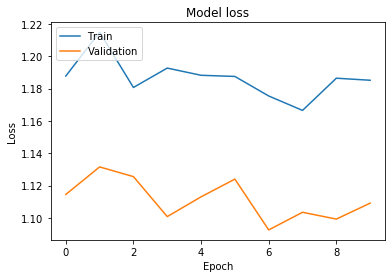

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

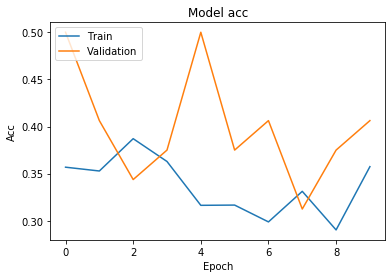

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('Acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
train_path = os.getcwd() + "/gdrive/My Drive/guys2/train/"
test_path = os.getcwd() + "/gdrive/My Drive/guys2/test/"

In [ ]:
class_names = os.listdir(train_path)
print(len(class_names))

3


In [ ]:
img_width, img_height = 100, 100
nb_train_samples = 510
nb_validation_samples = 75
epochs = 50
batch_size = 15
n_classes = 3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    zoom_range=0.2,
    rotation_range = 5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    vertical_flip = False)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Activation, Dropout, Flatten, Dense
def build_model_DenseNet():
    base_model = densenet.DenseNet121(include_top=True, 
                                      weights = None,
                                      input_tensor = None,
                                      input_shape = (img_width, img_height, 3),
                                      pooling = None,
                                      classes = n_classes)
    
    for layer in base_model.layers:
        layer.trainable = True

    model = Model(inputs = base_model.input, outputs = base_model.output)
    return model

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical')

Found 510 images belonging to 3 classes.
Found 75 images belonging to 3 classes.


In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
early_stop = EarlyStopping(monitor = 'val_loss', patience = 8, verbose=1, min_delta = 1e-4) 
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 4, verbose = 1, min_delta = 1e-4)

callbacks_list = [early_stop, reduce_lr]

In [ ]:
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
model = build_model_DenseNet()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
model_history = model.fit_generator(
    train_generator,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size,
    callbacks = callbacks_list,
    steps_per_epoch = nb_train_samples // batch_size)

Epoch 1/50
35/35 [==============================] - 101s 3s/step - loss: 1.1016 - acc: 0.5200 - val_loss: 8.5647 - val_acc: 0.3167
Epoch 2/50
35/35 [==============================] - 11s 320ms/step - loss: 0.8670 - acc: 0.6457 - val_loss: 4.4160 - val_acc: 0.4333
Epoch 3/50
35/35 [==============================] - 11s 311ms/step - loss: 0.8520 - acc: 0.6171 - val_loss: 0.9553 - val_acc: 0.6167
Epoch 4/50
35/35 [==============================] - 11s 310ms/step - loss: 0.6310 - acc: 0.7410 - val_loss: 4.6303 - val_acc: 0.3167
Epoch 5/50
35/35 [==============================] - 11s 311ms/step - loss: 0.6576 - acc: 0.7295 - val_loss: 7.7929 - val_acc: 0.3667
Epoch 6/50
35/35 [==============================] - 11s 309ms/step - loss: 0.4953 - acc: 0.8324 - val_loss: 8.4870 - val_acc: 0.3167
Epoch 7/50
35/35 [==============================] - 11s 310ms/step - loss: 0.4802 - acc: 0.8248 - val_loss: 2.5650 - val_acc: 0.6167

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.00010000000

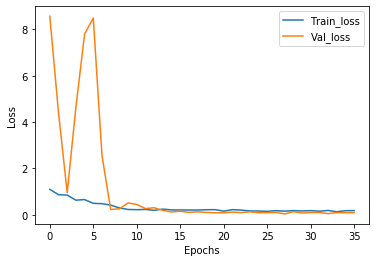

In [ ]:
H = model_history

plt.plot(H.history["loss"], label = "Train_loss")
plt.plot(H.history["val_loss"], label = "Val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

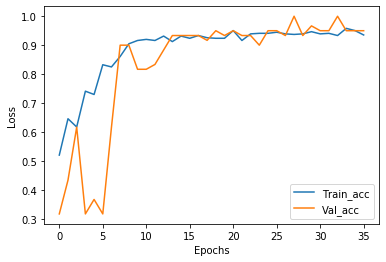

In [ ]:
plt.plot(H.history["acc"], label = "Train_acc")
plt.plot(H.history["val_acc"], label = "Val_acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(100, 100)


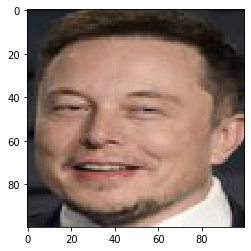

(1, 100, 100, 3)
<class 'numpy.ndarray'>
float32
1


In [ ]:
from tensorflow.keras.preprocessing import image as im
import matplotlib.pyplot as plt
import numpy as np

img_path = os.getcwd() + "/gdrive/My Drive/guys2/test/2/0cf2a457ec.jpg"

img = im.load_img(img_path, target_size = (img_width, img_height))
print(type(img))
print(img.size)

plt.imshow(img)
plt.show()

x = im.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255

print(x.shape)
print(type(x))
print(x.dtype)

ans = np.argmax(model.predict(x))
print(ans)

In [ ]:
import time
start_time = time.time()
print("Predicted class is", np.argmax(model.predict(x)))
print("Time to predict an image is", (time.time() - start_time), "seconds")

Predicted class is 1
Time to predict an image is 0.07187438011169434 seconds


In [ ]:
# Проверка качества сети (accuracy)

right = 0
wrong = 0
times = []

for folder in os.listdir(test_path):
    for img in os.listdir(test_path + folder):
        imag = im.load_img(test_path + folder + "/" + img, target_size = (img_width, img_height))
        
        photo_ar = im.img_to_array(imag)
        photo_ar = np.expand_dims(photo_ar, axis = 0)
        photo_ar /= 255
        
        start_time = time.time()
        ans = np.argmax(model.predict(photo_ar))
        times.append(time.time() - start_time)
        
        if ans == int(folder):
            right += 1
        else:
            wrong += 1

In [ ]:
print("Accuracy on validation set is", right/(right + wrong))
print("Average time to pridict one photo is", np.array(times).mean(), "seconds")

Accuracy on validation set is 0.02666666666666667
Average time to pridict one photo is 0.04735076904296875 seconds


In [ ]:
# Проверка качества сети по классам (Precision and Recall)
TP = [i - i for i in range(len(class_names))]
FN = [i - i for i in range(len(class_names))]
FP = [i - i for i in range(len(class_names))]

precision = [i - i for i in range(len(class_names))]
recall = [i - i for i in range(len(class_names))]


for folder in os.listdir(test_path):
    for img in os.listdir(test_path + folder):
        imag = im.load_img(test_path + folder + "/" + img, target_size = (img_width, img_height))
        
        photo_ar = im.img_to_array(imag)
        photo_ar = np.expand_dims(photo_ar, axis = 0)
        photo_ar /= 255
        
        ans = np.argmax(model.predict(photo_ar))
    
        if ans == int(folder):
            TP[ans] += 1
        if ans != int(folder):
            FN[ans] += 1
            FP[int(folder)-1] += 1

In [ ]:
for i in range(len(class_names)):
    precision[i] = TP[i]/(TP[i] + FP[i])
    recall[i] = TP[i]/(TP[i] + FN[i]) 
    
precision = np.array(precision)
recall = np.array(recall)

print(precision.max(), precision.min(), precision.mean())
print(recall.max(), recall.min(), recall.mean())

0.04 0.0 0.026153846153846156
0.041666666666666664 0.0 0.026709401709401708


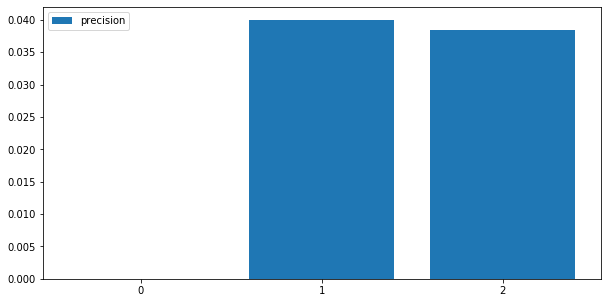

In [ ]:
# Визуализируем 

Fload = [i for i in range(3)]

plt.figure(figsize = (10,5))
x = range(len(precision))
ax = plt.gca()
ax.bar(Fload, precision, label = "precision")
ax.set_xticks(x)
plt.legend(loc = 'best')
plt.show()

## Готовые ноутбуки сохраняйте строго в формате .ipynb, 
**название файла должно иметь вид: Surname_Name_HWnumber.ipynb . Например: Lindemann_Nikita_04.ipynb

## Отправляйте ваши ноутбуки в гугл форму: 
https://docs.google.com/forms/d/e/1FAIpQLSeGn34zpzH-K8upCW8qOJIW4Enelro3NcGkI1v_5_0JUOExPw/viewform


# Спасибо за терпение и выполнение заданий!